In [182]:
import pandas as pd
import numpy as np

file = (r'C:\Users\asus\Downloads\airbnb utf\Airbnb_Open_Dataex.csv')

df = pd.read_csv(file, low_memory=False)
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,5/7/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,5/10/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,5/10/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [183]:
# Replace spaces with underscores and make all column names lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [184]:
# Clean columns with $ and spaces, and convert to float
currency_cols = ['price', 'service_fee'] 

for col in currency_cols:
    df[col] = (
        df[col]
        .astype(str)                     # Ensure it's string
        .str.strip()                 
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype(float)                 
    )

In [185]:
df.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [187]:
df.isnull().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            406
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [188]:
df.drop(columns=['name','country', 'country_code', 'license'], inplace=True)

In [189]:
dfx = df.copy()

In [190]:
dfx['house_rules'] = dfx['house_rules'].notnull().map({True: 'True', False: 'False'})

In [191]:
# population neighbourhood_group using neighbourhood mapping
maptemp = dfx.loc[dfx['neighbourhood_group'].notnull(),['neighbourhood','neighbourhood_group']] #map() only looks up values when the key exists.

In [192]:
# now make sure to remove duplicate keys/index and create index of the values you are not trying to fill
maptemp = maptemp.drop_duplicates('neighbourhood').set_index('neighbourhood')['neighbourhood_group']
dfx['neighbourhood_group'] = dfx['neighbourhood_group'].str.replace('brookln', 'Brooklyn', case=False)

In [193]:
dfx['neighbourhood_group'] = dfx['neighbourhood_group'].fillna(dfx['neighbourhood'].map(maptemp)) 

In [194]:
# service_fee = 0.2 * price and price = service_fee / 0.2
# So fill service_fee where missing
dfx['service_fee'] = dfx['service_fee'].fillna(dfx['price'] * 0.2).round(0)
dfx['price'] = dfx['price'].fillna(dfx['service_fee'] / 0.2).round(0)

In [195]:
# Drop rows where any value is missing from 'name' to 'minimum_nights'
dfx = dfx.dropna(subset=dfx.loc[:, 'id':'minimum_nights'].columns)

In [196]:
dfx.loc[:, 'number_of_reviews':'calculated_host_listings_count'] \
  .sort_values(by=['number_of_reviews','reviews_per_month'], ascending=[True, False]).head(10)

# we can see that if number_of_reviews are zero, then last_review and reviews_per_month are also zero.

,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count
37,0.0,NaN,NaN,NaN,1.0
39,0.0,NaN,NaN,3.0,1.0
261,0.0,NaN,NaN,1.0,7.0
277,0.0,NaN,NaN,2.0,1.0
346,0.0,NaN,NaN,3.0,3.0
350,0.0,NaN,NaN,1.0,1.0
391,0.0,NaN,NaN,4.0,1.0
438,0.0,NaN,NaN,3.0,1.0
487,0.0,NaN,NaN,NaN,2.0
546,0.0,NaN,NaN,1.0,1.0


In [197]:
dfx['number_of_reviews'].value_counts()

number_of_reviews
0.0      15526
1.0      10288
2.0       7103
3.0       5308
4.0       4091
         ...  
367.0        1
648.0        1
567.0        1
592.0        1
300.0        1
Name: count, Length: 474, dtype: int64

In [198]:
dfx['last_review'] = pd.to_datetime(dfx['last_review'], errors='coerce')

In [199]:
dfx = dfx[~((dfx['number_of_reviews'] > 0) & (
    dfx[['number_of_reviews', 'last_review', 'reviews_per_month']].isna().any(axis=1)
))]

dfx = dfx.dropna(subset=['number_of_reviews','review_rate_number', 'calculated_host_listings_count','availability_365'])

In [200]:
dfx.isnull().sum()

id                                    0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
construction_year                     0
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                       15246
reviews_per_month                 15246
review_rate_number                    0
calculated_host_listings_count        0
availability_365                      0
house_rules                           0
dtype: int64

In [201]:
len(dfx)

100131

In [202]:
dfx.reset_index(drop=True, inplace=True)

In [203]:
dfx['house_rules'] = dfx['house_rules'].map({'True': 1, 'False': 0})

dfx['instant_bookable'] = dfx['instant_bookable'].map({True: 1, False: 0})

dfx['host_identity_verified'] = dfx['host_identity_verified'].map({'verified': 1, 'unconfirmed': 0})

In [204]:
print(dfx['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [205]:
dfx['instant_bookable']

0         0
1         0
2         1
3         0
4         1
         ..
100126    0
100127    1
100128    1
100129    1
100130    0
Name: instant_bookable, Length: 100131, dtype: int64

In [206]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100131 entries, 0 to 100130
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              100131 non-null  int64         
 1   host_id                         100131 non-null  int64         
 2   host_identity_verified          100131 non-null  int64         
 3   host_name                       100131 non-null  object        
 4   neighbourhood_group             100131 non-null  object        
 5   neighbourhood                   100131 non-null  object        
 6   lat                             100131 non-null  float64       
 7   long                            100131 non-null  float64       
 8   instant_bookable                100131 non-null  int64         
 9   cancellation_policy             100131 non-null  object        
 10  room_type                       100131 non-null  object 

In [207]:
dfx.head()

,id,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,80014485718,0,Madaline,Brooklyn,Kensington,40.64749,-73.97237,0,strict,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,1
1,1002102,52335172823,1,Jenna,Manhattan,Midtown,40.75362,-73.98377,0,moderate,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,1
2,1002755,85098326012,0,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,1,moderate,...,368.0,74.0,30.0,270.0,2019-05-07,4.64,4.0,1.0,322.0,0
3,1003689,92037596077,1,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,0,moderate,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,1
4,1004098,45498551794,1,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,1,flexible,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,1


## Now the data is cleaned 

## EDA 

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='neighbourhood_group', ylabel='price'>

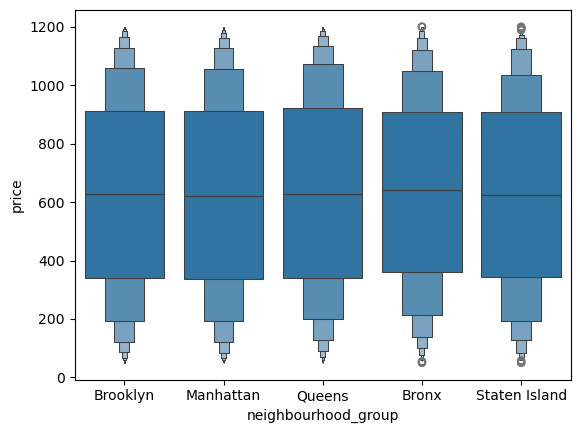

In [211]:
sns.boxenplot(x='neighbourhood_group', y='price', data=dfx)

<Axes: xlabel='number_of_reviews', ylabel='price'>

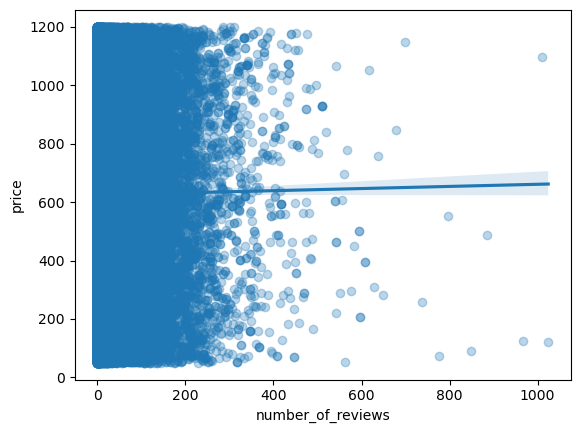

In [212]:
sns.regplot(x='number_of_reviews', y='price', data=dfx, scatter_kws={'alpha':0.3})

<Axes: xlabel='last_review'>

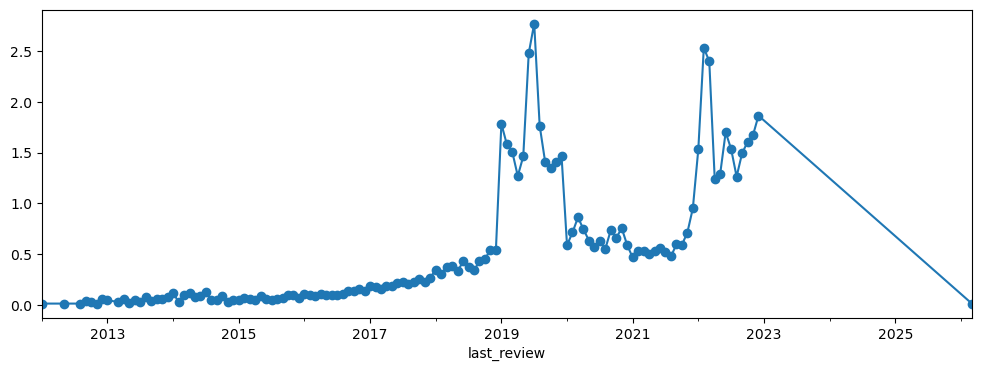

In [213]:
dfx['last_review'] = pd.to_datetime(dfx['last_review'])
monthly_reviews = dfx.groupby(dfx['last_review'].dt.to_period('M'))['reviews_per_month'].mean()
monthly_reviews.plot(figsize=(12,4), marker='o')

<Axes: >

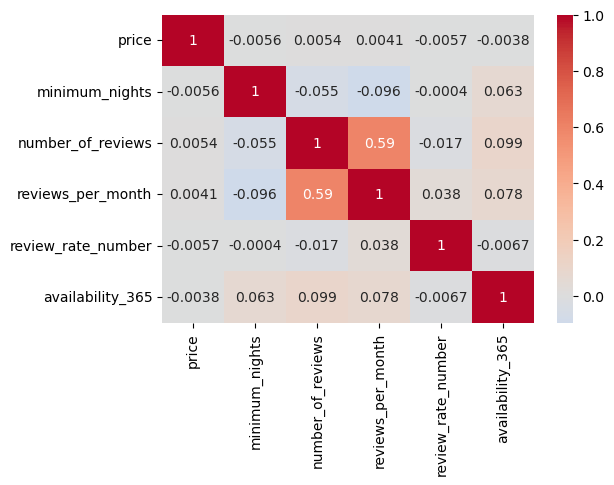

In [214]:
plt.figure(figsize=(6,4))
sns.heatmap(dfx[['price','minimum_nights','number_of_reviews',
                 'reviews_per_month','review_rate_number','availability_365']].corr(),
            annot=True, cmap='coolwarm', center=0)

In [215]:
import plotly.express as px

fig = px.scatter_mapbox(
    dfx.sample(5000),
    lat='lat',
    lon='long',
    color='price',
    hover_data=['room_type', 'neighbourhood'],
    zoom=10,
    mapbox_style='open-street-map'  # ← This is the missing piece
)

fig.update_layout(title='Airbnb Price Distribution Map (sample of 5000)', margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


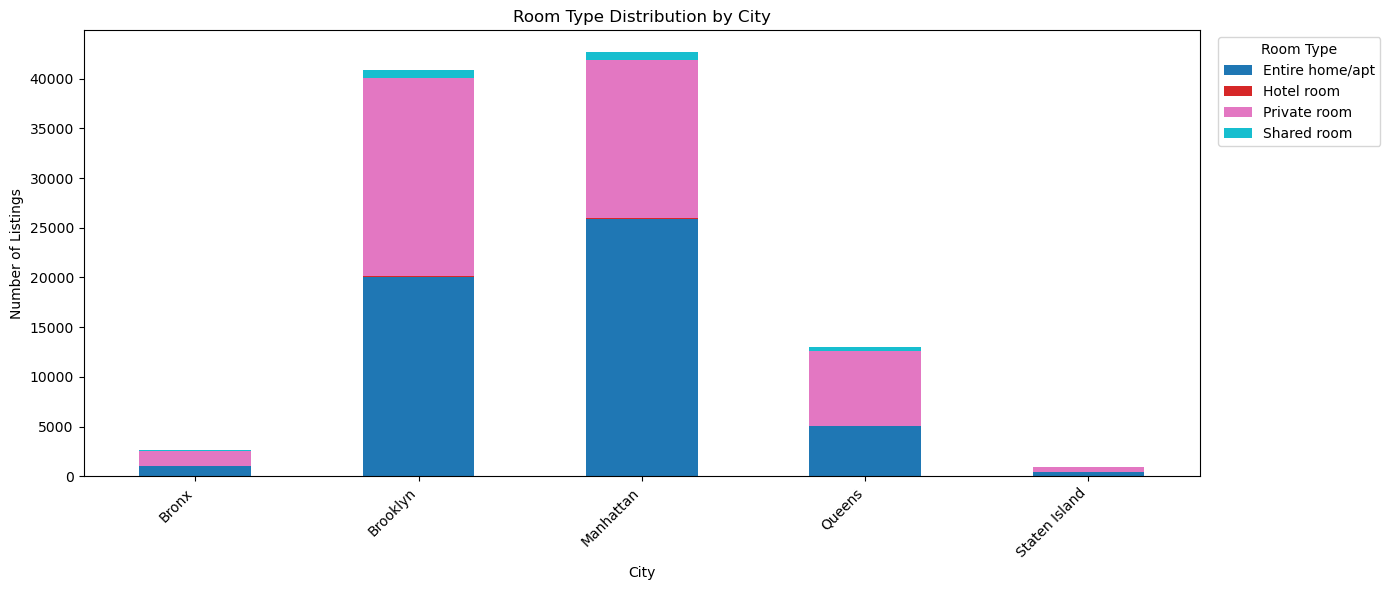

In [216]:
# 1. Create a pivot table: rows = city, columns = room_type, values = counts
city_room_counts = dfx.pivot_table(index='neighbourhood_group', columns='room_type', aggfunc='size', fill_value=0)

# 2. Plot stacked bar
city_room_counts.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab10')

# 3. Formatting
plt.title('Room Type Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [217]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = [
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'review_rate_number',
    'calculated_host_listings_count',
    'availability_365',
    'instant_bookable',
    'host_identity_verified',
    'house_rules'
]

# Target and features
X = dfx[features]
y = dfx['price']

# Optional: Remove extreme prices
X = X[y < 1000]
y = y[y < 1000]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [219]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: $196.74
R² Score: 0.21


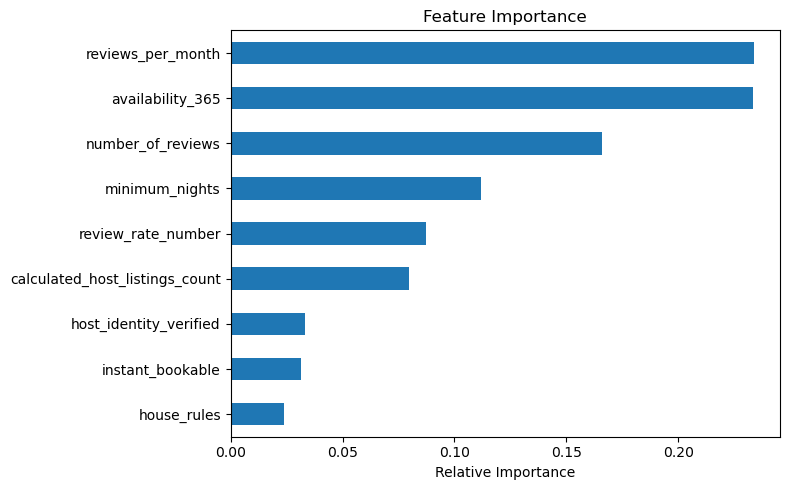

In [220]:
importance = model.feature_importances_
feat_importance = pd.Series(importance, index=features).sort_values()

feat_importance.plot(kind='barh', figsize=(8, 5), title='Feature Importance')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


## Summary
Model Performance Summary
The model achieved an R² score of 0.21 and a mean absolute error of ~$197, indicating modest predictive performance.

This is expected, as Airbnb pricing is influenced by several unstructured or unavailable factors like listing photos, guest experience, local events, and host reputation — none of which are captured in this dataset.

Still, the model helps identify structured drivers of pricing, such as availability, room type, and review activity, and serves as a foundation for more advanced modeling with richer data.